In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import warnings
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [6]:
test_raw = pd.read_csv('test.csv')

In [7]:
test_raw

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치
5,2021-02-03,수,2924,59,199,5,286.0,모닝롤/게살모닝샌드 우유/주스 계란후라이/찐계란 소고기죽/흑미밥 시래기된장국 베이컨...,쌀밥/흑미밥/찰현미밥 아욱국 매콤해물볶음 감자조림 미나리나물 포기김치 콥샐러드*렌치D,오므라이스 가쓰오장국 빌소세지구이*구운채소 단감치커리무침 양념고추지 겉절이김치
6,2021-02-04,목,2924,61,211,476,288.0,모닝롤/사과파이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 아욱국 새송이버섯곤약장...,쌀밥/차조밥/찰현미밥 설렁탕 고등어김치말이찜 볼어묵굴소스볶음 브로콜리숙회*초장 석박...,흑미밥 계란파국 돈육두루치기 감자채파프리카볶음 세발나물오리엔탈무침 포기김치
7,2021-02-05,금,2924,169,252,0,256.0,모닝롤/앙버터모닝빵 우유/주스 계란후라이/찐계란 고구마죽/흑미밥 옹심이국 머위나물무...,쌀밥/흑미밥/찰현미밥 북엇국 닭볶음탕 채소전*장 솎음열무나물무침 포기김치 양상추샐러...,유부초밥/추가밥 온메밀소바 국물떡볶이 순대찜*소금 청경채겉절이 포기김치
8,2021-02-08,월,2924,88,174,690,329.0,모닝롤/스콘 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 꽃게탕 근대나물무침 연두부...,쌀밥/흑미밥/찰현미밥 감자양파국 돈수육*씨앗쌈장 매콤어묵볶음 콩나물파채무침 포기김치...,흑미밥 냉이국 반반치킨 꼬막채소무침 청경채찜 포기김치
9,2021-02-09,화,2924,94,183,542,329.0,모닝롤/치즈팡샌드 우유/주스 계란후라이/찐계란 팥죽/흑미밥 맑은버섯국 시금치나물무침...,쌀밥/기장밥/찰현미밥 장각백숙 적어양념장구이 채소스틱*쌈장 도라지오이초무침 겉절이김...,흑미밥 미역국 매운소불고기 단호박두부탕수 메추리알장조림 석박지


In [8]:
train_raw = pd.read_csv('train.csv')

In [9]:
sample = pd.read_csv('sample_submission.csv')

## 주제 : 구내식당의 요일별 점심, 저녁식사를 먹는 인원을 예측

In [10]:
#1. 칼럼명 전처리 -> ex 날짜 : date 등 

In [11]:
train = train_raw.copy()
train.columns = ['date', 'day', 'emps', 'dOff', 'busTrip', 'ovTime', 'remote', 'bkMenu', 'lnMenu', 'dnMenu', 'target_ln', 'target_dn']

In [12]:
train.head(2)

,date,day,emps,dOff,busTrip,ovTime,remote,bkMenu,lnMenu,dnMenu,target_ln,target_dn
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


In [13]:
test = test_raw.copy()
test.columns = ['date', 'day', 'emps', 'dOff', 'busTrip', 'ovTime', 'remote', 'bkMenu', 'lnMenu', 'dnMenu']

In [14]:
#2.요일 변환 [월 = 0 ~ 금 = 4]
train['day'] = train['day'].map({'월':0, '화':1, '수':2, '목':3, '금':4})
test['day'] = test['day'].map({'월':0, '화':1, '수':2, '목':3, '금':4})

In [15]:
#날짜 변환 
def to_datetime(df, date):
    df['date'] = pd.to_datetime(df[date])
to_datetime(train, 'date'); to_datetime(test, 'date')

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1205 non-null   datetime64[ns]
 1   day        1205 non-null   int64         
 2   emps       1205 non-null   int64         
 3   dOff       1205 non-null   int64         
 4   busTrip    1205 non-null   int64         
 5   ovTime     1205 non-null   int64         
 6   remote     1205 non-null   float64       
 7   bkMenu     1205 non-null   object        
 8   lnMenu     1205 non-null   object        
 9   dnMenu     1205 non-null   object        
 10  target_ln  1205 non-null   float64       
 11  target_dn  1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 113.1+ KB


In [17]:
train.head(5)

,date,day,emps,dOff,busTrip,ovTime,remote,bkMenu,lnMenu,dnMenu,target_ln,target_dn
0,2016-02-01,0,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,1,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,2,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,3,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,4,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1205 non-null   datetime64[ns]
 1   day        1205 non-null   int64         
 2   emps       1205 non-null   int64         
 3   dOff       1205 non-null   int64         
 4   busTrip    1205 non-null   int64         
 5   ovTime     1205 non-null   int64         
 6   remote     1205 non-null   float64       
 7   bkMenu     1205 non-null   object        
 8   lnMenu     1205 non-null   object        
 9   dnMenu     1205 non-null   object        
 10  target_ln  1205 non-null   float64       
 11  target_dn  1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 113.1+ KB


In [19]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
day,1205.0,2.003320,1.415384,0.0,1.0,2.0,3.0,4.0
emps,1205.0,2807.815768,171.264404,2601.0,2645.0,2760.0,2962.0,3305.0
dOff,1205.0,157.913693,144.190572,23.0,71.0,105.0,185.0,1224.0
busTrip,1205.0,241.142739,43.532298,41.0,217.0,245.0,272.0,378.0
ovTime,1205.0,274.117012,246.239651,0.0,4.0,299.0,452.0,1044.0
remote,1205.0,43.506224,109.937400,0.0,0.0,0.0,0.0,533.0
target_ln,1205.0,890.334440,209.505057,296.0,758.0,879.0,1032.0,1459.0
target_dn,1205.0,461.772614,139.179202,0.0,406.0,483.0,545.0,905.0


In [20]:
# 일별 점심메뉴를 작은 리스트로 갖고 있는 큰 리스트 (lunch) 만들기 
lunch = []
for day in range(len(train)):
    tmp = train.iloc[day, 8].split(' ') # 공백으로 문자열 구분 
    tmp = ' '.join(tmp).split()    # 빈 원소 삭제

    search = '('   # 원산지 정보는 삭제
    for menu in tmp:
        if search in menu:
            tmp.remove(menu)
    
    lunch.append(tmp)

In [21]:
lunch

[['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '시래기국', '훈제오리구이', '도토리묵무침', '쌈무/양파절임', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '꽃게탕', '돈육굴소스볶음', '옥수수전', '유채나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '시금치국', '닭감자조림', '연두부*양념장', '콩나물무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '쇠고기무국', '탕수어', '오징어숙회무침', '취나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '냉이된장국', '쇠고기장조림', '통도라지구이', '치커리무침', '요구르트', '포기김치'],
 ['낙지비빔밥', '유부장국', '고구마치즈구이', '해초무침', '요구르트', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '대구찌개', '마늘간장치킨', '새송이버섯볶음', '돌나물무침/치킨무', '요구르트', '포기김치'],
 ['쌀밥/오곡밥', '쇠고기느타리국', '갈치구이', '호박꼬지&고사리&무나물', '파래김*양념장', '부럼/요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '콩나물국', '돈육간장볶음', '버섯잡채', '꽃상추무침', '요구르트', '포기김치'],
 ['비빔밥', '팽이장국', '소세지피망볶음', '맛탕', '귤', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '북어계란국', '닭갈비

In [22]:
# lunch train data에 메뉴명별 칼럼 만들기 (밥, 국, 반찬1-3)
bob = []; gook = []; banchan1 = []; banchan2 = []; banchan3 = []; kimchi = []; side = []
for i, day_menu in enumerate(lunch):
    bob_tmp = day_menu[0]; bob.append(bob_tmp)
    gook_tmp = day_menu[1]; gook.append(gook_tmp)
    banchan1_tmp = day_menu[2]; banchan1.append(banchan1_tmp)
    banchan2_tmp = day_menu[3]; banchan2.append(banchan2_tmp)
    banchan3_tmp = day_menu[4]; banchan3.append(banchan3_tmp)

    if i < 1067:
        kimchi_tmp = day_menu[-1]; kimchi.append(kimchi_tmp)
        side_tmp = day_menu[-2]; side.append(side_tmp)
    else: 
        kimchi_tmp = day_menu[-2]; kimchi.append(kimchi_tmp)
        side_tmp  = day_menu[-1]; side.append(side_tmp)

In [23]:
train_ln = train[['date', 'day', 'emps', 'dOff', 'busTrip', 'ovTime', 'remote', 'lnMenu', 'target_ln']]
train_ln['bob'] = bob
train_ln['gook'] = gook
train_ln['banchan1'] = banchan1; train_ln['banchan2'] = banchan2; train_ln['banchan3'] = banchan3
train_ln['kimchi'] = kimchi 
train_ln['side'] = side

<ipython-input-23-5377ef83eccc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ln['bob'] = bob
<ipython-input-23-5377ef83eccc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ln['gook'] = gook


In [24]:
train_ln

,date,day,emps,dOff,busTrip,ovTime,remote,lnMenu,target_ln,bob,gook,banchan1,banchan2,banchan3,kimchi,side
0,2016-02-01,0,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...",1039.0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,포기김치,요구르트
1,2016-02-02,1,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...",867.0,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,배추겉절이,요구르트
2,2016-02-03,2,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...",1017.0,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,포기김치,요구르트
3,2016-02-04,3,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...",978.0,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,포기김치,요구르트
4,2016-02-05,4,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...",925.0,쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,포기김치,요구르트
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,2,2983,75,198,4,391.0,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,1093.0,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,단호박물김치,양상추샐러드*오리엔탈D
1201,2021-01-21,3,2983,92,231,462,351.0,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,832.0,쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,무생채,양상추샐러드*파인D
1202,2021-01-22,4,2983,255,248,1,303.0,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,579.0,전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,포기김치,양상추샐러드*자몽D
1203,2021-01-25,0,2983,107,153,616,327.0,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,1145.0,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,봄동겉절이/양념김,양상추샐러드*오렌지D


In [25]:
3.점심이랑 저녁 식당

SyntaxError: invalid syntax (<ipython-input-25-64c524c3b845>, line 1)

In [26]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(train["target_ln"], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(train["target_dn"], ax = ax[1], color = 'green', kde = False, rug = True)
plt.show()

NameError: name 'plt' is not defined

In [27]:
df = train[['target_ln', 'target_dn', 'emps', 'dOff', 'busTrip', 'ovTime', 'remote']]
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(16, 5))
sns.heatmap(df.corr(), 
            annot=True, 
            cmap="BrBG", 
            mask = mask)
ax.set_title('Correlation Heatmap', pad = 10)
plt.show()

<ipython-input-27-2fe93f16e2dd>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


NameError: name 'plt' is not defined

In [28]:
fig, ax = plt.subplots(figsize = (18, 8), ncols = 4, nrows = 2, sharey=True)
plt.rcParams['font.size'] = 12
sns.color_palette("Paired")
train_features = ['emps', 'dOff', 'busTrip', 'ovTime', 'emps', 'dOff', 'busTrip', 'ovTime']
for i, feature in enumerate(train_features):
    row = int(i/4)
    col = i%4 
    if i < 4:
        sns.regplot(x=feature, y = 'target_ln', data = train, ax = ax[row][col], color = 'salmon', marker = '+')
    else: 
        sns.regplot(x=feature, y = 'target_dn', data = train, ax = ax[row][col], color = 'skyblue', marker = '+')

NameError: name 'plt' is not defined

In [29]:
4.월별/요일별 패턴

SyntaxError: invalid syntax (<ipython-input-29-3d1e6bc90f53>, line 1)

In [30]:
tmp = train[['date', 'day', 'emps', 'dOff', 'busTrip', 'ovTime', 'remote', 'target_ln', 'target_dn']]
tmp
tmp['month'] = tmp['date'].dt.strftime("%m")

tmp_ln = tmp.groupby(['day', 'month'])['target_ln'].mean().reset_index().pivot('day', 'month', 'target_ln')
tmp_dn = tmp.groupby(['day', 'month'])['target_dn'].mean().reset_index().pivot('day', 'month', 'target_dn')

<ipython-input-30-eced1e4d2c1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['month'] = tmp['date'].dt.strftime("%m")


In [31]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))

sns.heatmap(tmp_ln, cmap='RdYlGn_r', ax=ax[0])
ax[0].set_title('Lunch', pad = 12)
sns.heatmap(tmp_dn, cmap='RdYlGn_r', ax=ax[1])
ax[1].set_title('Dinner', pad = 12)

plt.show()

NameError: name 'plt' is not defined

In [32]:
# 자기개발의 날 삭제 
idx = train[train.target_dn == 0].index
tmp = train.drop(idx)
tmp['month'] = tmp['date'].dt.strftime("%m")
tmp_dn2 = tmp.groupby(['day', 'month'])['target_dn'].mean().reset_index().pivot('day', 'month', 'target_dn')

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))

sns.heatmap(tmp_ln, cmap='RdYlGn_r', ax=ax[0])
ax[0].set_title('Lunch', pad = 12)
sns.heatmap(tmp_dn2, cmap='RdYlGn_r', ax=ax[1])
ax[1].set_title('Dinner - NEW', pad = 12)

plt.show()

NameError: name 'plt' is not defined

In [33]:
before = train['date'].dt.year < 2020
after = train['date'].dt.year >= 2020

def heatmap_viz(df): 
    df['month'] = df['date'].dt.strftime("%m")
    before = df['date'].dt.year < 2020
    after = df['date'].dt.year >= 2020

    tmp_dayoff = df.groupby(['day', 'month'])['dOff'].mean().reset_index().pivot('day', 'month', 'dOff')
    tmp_bustrip = df.groupby(['day', 'month'])['busTrip'].mean().reset_index().pivot('day', 'month', 'busTrip')
    tmp_ovtime = df.groupby(['day', 'month'])['ovTime'].mean().reset_index().pivot('day', 'month', 'ovTime')
    tmp_remote_after = df[after].groupby(['day', 'month'])['remote'].mean().reset_index().pivot('day', 'month', 'remote')

    fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30, 5), sharey = True)

    sns.heatmap(tmp_dayoff, cmap='Oranges', ax=ax[0])   #1 
    ax[0].set_title('Dayoff', pad = 12)
    sns.heatmap(tmp_bustrip, cmap='Greens', ax=ax[1])   #2 
    ax[1].set_title('Business Trip', pad = 12)
    sns.heatmap(tmp_ovtime, cmap='Blues', ax=ax[2])   #3
    ax[2].set_title('Overtime', pad = 12)
    sns.heatmap(tmp_remote_after, cmap='Purples', ax=ax[3])   # 4
    ax[3].set_title('Remote (2020-21 only)', pad = 12)
   
    plt.show()

df = train[['date', 'day', 'dOff', 'busTrip', 'ovTime', 'remote']]
heatmap_viz(df)

<ipython-input-33-5a87ecd5e44b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.strftime("%m")


NameError: name 'plt' is not defined

In [34]:
df = train[['date', 'day', 'emps', 'dOff', 'busTrip', 'ovTime', 'remote', 'target_ln', 'target_dn']]
df['in_office'] = df['emps'] - (df['dOff'] + df['busTrip'] + df['remote'])
df['month'] = df['date'].dt.strftime("%m")
df.head(3)

<ipython-input-34-72ff0e700814>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_office'] = df['emps'] - (df['dOff'] + df['busTrip'] + df['remote'])
<ipython-input-34-72ff0e700814>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.strftime("%m")


,date,day,emps,dOff,busTrip,ovTime,remote,target_ln,target_dn,in_office,month
0,2016-02-01,0,2601,50,150,238,0.0,1039.0,331.0,2401.0,02
1,2016-02-02,1,2601,50,173,319,0.0,867.0,560.0,2378.0,02
2,2016-02-03,2,2601,56,180,111,0.0,1017.0,573.0,2365.0,02


In [35]:
tmp = df.groupby(['day', 'month'])['in_office'].mean().reset_index().pivot('day', 'month', 'in_office')

# Heatmap
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 4))

sns.heatmap(tmp, cmap='YlGnBu', ax = ax[0])    # 1 
ax[0].set_title('No. of Employees in Office', pad = 12)

df_corr = df[['target_ln', 'target_dn', 'emps', 'dOff', 'busTrip', 'ovTime', 'remote', 'in_office']]   # 2
mask = np.triu(np.ones_like(df_corr.corr(), dtype=np.bool))
sns.heatmap(df_corr.corr(), 
            annot=True, 
            cmap="BrBG", 
            mask = mask, 
            ax =ax[1])
ax[1].set_title('Correlation Heatmap ("in_office" added)', pad = 10)
plt.show()

NameError: name 'plt' is not defined

In [36]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [37]:
## 동아리 2번째 : 데이터 전처리 및 분석 

In [38]:
train.drop(['bkMenu'], axis =1 ,inplace =True)

In [39]:
train

,date,day,emps,dOff,busTrip,ovTime,remote,lnMenu,dnMenu,target_ln,target_dn
0,2016-02-01,0,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,1,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,2,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,3,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,4,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,2,2983,75,198,4,391.0,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,3,2983,92,231,462,351.0,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,4,2983,255,248,1,303.0,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,0,2983,107,153,616,327.0,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


In [40]:
target_dn_none= train[train['target_dn'] == 0].index
train= train.drop(target_dn_none)

In [41]:
#train
trc = train.copy()

In [42]:
trc['year'] = trc.date.apply(lambda x : x.year)
trc['month'] = trc.date.apply(lambda x : x.month)
trc['day0'] = trc.date.apply(lambda x : x.day)

In [43]:
trc=trc.drop('date', axis = 1)

In [44]:
trc

,day,emps,dOff,busTrip,ovTime,remote,lnMenu,dnMenu,target_ln,target_dn,year,month,day0
0,0,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1
1,1,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,2,2
2,2,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016,2,3
3,3,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2016,2,4
4,4,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2,2983,75,198,4,391.0,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,2021,1,20
1201,3,2983,92,231,462,351.0,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,2021,1,21
1202,4,2983,255,248,1,303.0,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,2021,1,22
1203,0,2983,107,153,616,327.0,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,2021,1,25


In [45]:
trc.drop(['lnMenu','dnMenu'], axis = 1 ,inplace =True)

In [46]:
## 중식계와 석식계의 경우, 휴가계와 재택근무를 하는 직원이 빠질 확룰이 100%라고 예상 
trc = trc.assign(Target_emp = lambda x : (x['emps'] - x['dOff']))

In [47]:
trc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   day         1162 non-null   int64  
 1   emps        1162 non-null   int64  
 2   dOff        1162 non-null   int64  
 3   busTrip     1162 non-null   int64  
 4   ovTime      1162 non-null   int64  
 5   remote      1162 non-null   float64
 6   target_ln   1162 non-null   float64
 7   target_dn   1162 non-null   float64
 8   year        1162 non-null   int64  
 9   month       1162 non-null   int64  
 10  day0        1162 non-null   int64  
 11  Target_emp  1162 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 118.0 KB


In [48]:
#trc=trc.drop('date', axis = 1)
trc["ovTime"] = trc["ovTime"].astype("float")
trc["busTrip"] = trc["busTrip"].astype("float")
trc["dOff"] = trc["dOff"].astype("float")
trc["emps"] = trc["emps"].astype("float")
trc["day"] = trc["day"].astype("category")
trc["year"] = trc["year"].astype("category")
trc["month"] = trc["month"].astype("category")
trc["day0"] = trc["day0"].astype("category")
trc["Target_emp"] = trc["Target_emp"].astype("float")

In [49]:
trc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   day         1162 non-null   category
 1   emps        1162 non-null   float64 
 2   dOff        1162 non-null   float64 
 3   busTrip     1162 non-null   float64 
 4   ovTime      1162 non-null   float64 
 5   remote      1162 non-null   float64 
 6   target_ln   1162 non-null   float64 
 7   target_dn   1162 non-null   float64 
 8   year        1162 non-null   category
 9   month       1162 non-null   category
 10  day0        1162 non-null   category
 11  Target_emp  1162 non-null   float64 
dtypes: category(4), float64(8)
memory usage: 88.3 KB


<AxesSubplot:>

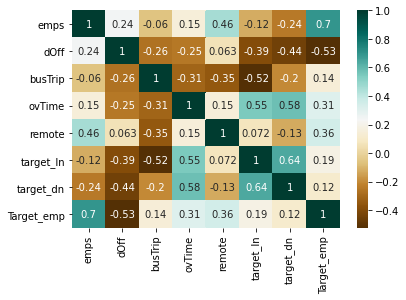

In [50]:
sns.heatmap(trc.corr(), 
            annot=True, 
            cmap="BrBG")

In [51]:
sns.heatmap(trc_1.corr(), 
            annot=True, 
            cmap="YlOrRd")

NameError: name 'trc_1' is not defined

In [ ]:
trc

In [52]:
y_train_df = trc[['target_ln']]
X_train_df = trc.drop(['target_ln'], axis = 1, inplace = False)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df, test_size = 0.3, random_state = 42)

In [54]:
#1. RMSLE 

from sklearn.metrics import mean_squared_error , mean_absolute_error

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    
    print('rmse : {0:.3F}, mae : {1:.3F}'.format(rmse_val, mae_val))

In [55]:
# 로그 변환, 피처 인코딩, 모델 학습/예측/평가

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

rmse : 103.551, mae : 81.069


In [57]:
def get_top_error_data(y_test, pred, n_tops = 5):
    result_df = pd.DataFrame(y_test.values, columns =['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    
    print(result_df.sort_values('diff', ascending = False)[:n_tops])
    
get_top_error_data(y_test, pred, n_tops = 5)

     real_count  predicted_count   diff
296      1214.0            808.0  406.0
344      1090.0            739.0  351.0
264       296.0            626.0  330.0
328      1215.0            921.0  294.0
334       939.0           1218.0  279.0


array([[<AxesSubplot:title={'center':'target_ln'}>]], dtype=object)

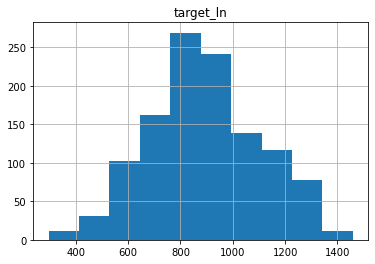

In [58]:
y_train_df.hist()

array([[<AxesSubplot:title={'center':'target_ln'}>]], dtype=object)

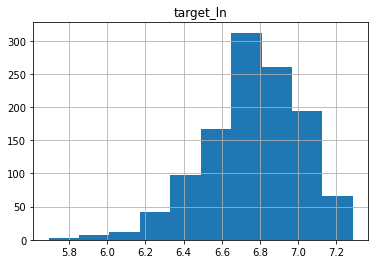

In [59]:
y_log = np.log1p(y_train_df)
y_log.hist()

<AxesSubplot:>

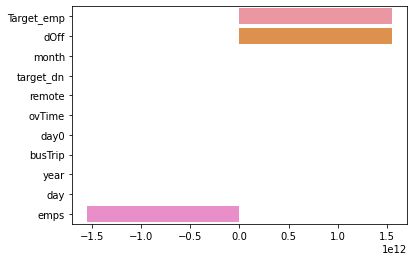

In [60]:
coef = pd.Series(lr_reg.coef_.flatten(), index = X_train_df.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [66]:
def get_model_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    evaluate_regr(y_test, pred)

In [61]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

ModuleNotFoundError: No module named 'xgboost'

In [72]:
model = RandomForestRegressor(random_state=42)

In [73]:
for models in [model]:
    get_model_predict(models, X_train.values, X_test.values, y_train.values, y_test.values)

<ipython-input-66-a8cbe4af51f3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


rmse : 94.437, mae : 69.883


In [76]:
#1. 중식 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y1_train, test_size = 0.3, random_state = 42)

In [77]:
for models in [model]:
    get_model_predict(models, X_train.values, X_test.values, y_train.values, y_test.values)

rmse : 117.704, mae : 84.250


In [78]:
#1. 석식
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y2_train, test_size = 0.3, random_state = 42)

In [79]:
for models in [model]:
    get_model_predict(models, X_train.values, X_test.values, y_train.values, y_test.values)

rmse : 76.920, mae : 56.922


In [80]:
train[['ovTime']]

,ovTime
0,238
1,319
2,111
3,355
4,34
...,...
1200,4
1201,462
1202,1
1203,616


In [488]:
#구내식당 요일별 구내식당 인원수 - 베이스라인

In [491]:
train.head(2)

,date,day,emps,dOff,busTrip,ovTime,remote,lnMenu,dnMenu,target_ln,target_dn
0,2016-02-01,0,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,1,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


In [74]:
train = train.assign(Target_emp = lambda x : (x['emps'] - x['dOff']))

In [494]:
train.head(2)

,date,day,emps,dOff,busTrip,ovTime,remote,lnMenu,dnMenu,target_ln,target_dn,Target_emp
0,2016-02-01,0,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2551
1,2016-02-02,1,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2551


In [492]:
test.head(2)

,date,day,emps,dOff,busTrip,ovTime,remote,bkMenu,lnMenu,dnMenu
0,2021-01-27,2,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,3,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지


In [70]:
test = test.assign(Target_emp = lambda x : (x['emps'] - x['dOff']))

In [75]:
#베이스 라인 - 수치만을 이용 
x_train = train[['day', 'Target_emp', 'busTrip', 'ovTime', 'remote']]
y1_train = train['target_ln']
y2_train = train['target_dn']

x_test = test[['day', 'Target_emp', 'busTrip', 'ovTime', 'remote']]

In [498]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [499]:
#1. 점심 식당 이용자 

In [514]:
model1 = RandomForestRegressor(random_state=42)

In [509]:
#결정 트리 
model1_df = DecisionTreeClassifier(random_state = 42)
model1_df.fit(x_train, y1_train)
df_pred1 = model1_df.predict(x_test)
df_pred1

array([ 831.,  963.,  702., 1145.,  904., 1188.,  963.,  620., 1274.,
       1128.,  720., 1273., 1138., 1254.,  834.,  639., 1118., 1046.,
        713.,  834.,  477., 1046.,  831.,  923.,  660., 1257., 1015.,
        831., 1034.,  620., 1145.,  963.,  719.,  749.,  620., 1274.,
       1015.,  791.,  653.,  477., 1184., 1015.,  831.,  653.,  512.,
       1274., 1015.,  999.,  829.,  620.])

In [510]:
#랜덤포레스트위한 사이킷런 classifier
model1_rf_clf = RandomForestClassifier(random_state = 42)
model1_rf_clf.fit(x_train, y1_train)
rf_pred1 = model1_rf_clf.predict(x_test)
rf_pred1

array([1093.,  832.,  579., 1145.,  861., 1254.,  963.,  620., 1110.,
       1015.,  720., 1273., 1202., 1254.,  797.,  639., 1062., 1046.,
        704.,  959.,  450.,  977., 1093.,  923.,  620., 1317.,  977.,
       1135.,  959.,  784., 1145., 1202., 1093.,  832.,  839., 1110.,
        781.,  791.,  662.,  620., 1110.,  781.,  791.,  781.,  512.,
       1110., 1015., 1135.,  959.,  512.])

In [511]:
#로지스틱 회귀
model1_lr_clf = LogisticRegression()
model1_lr_clf.fit(x_train, y1_train)
lr_pred1 = model1_lr_clf.predict(x_test)
lr_pred1

C:\Users\dajin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([ 879.,  880.,  780., 1145.,  839.,  879.,  839.,  759.,  839.,
        839., 1006., 1252., 1202.,  879.,  880.,  639., 1110., 1110.,
        879.,  784.,  639., 1110., 1006.,  793.,  759., 1329., 1317.,
       1006.,  839.,  780., 1252.,  880.,  879.,  880.,  759., 1083.,
        880.,  879.,  880.,  639.,  839.,  839.,  879.,  880.,  639.,
       1083., 1145.,  879.,  880.,  639.])

In [538]:
#2. 저녁 식당 이용자 

In [539]:
model2 = RandomForestRegressor(n_jobs=-1, random_state=42)

In [540]:
#결정 트리 
model2_df = DecisionTreeClassifier(random_state = 42)
model2_df.fit(x_train, y2_train)
df_pred1_2 = model2_df.predict(x_test)
df_pred1_2

array([339., 439., 192., 594., 542., 495., 445., 192., 570., 542., 337.,
       655., 679., 495., 462., 309., 594., 679., 304., 345., 269., 679.,
       412., 345., 358., 502., 545., 412., 345., 192., 651., 603., 495.,
       461., 192., 651., 502., 362., 439., 309., 651., 502., 362., 353.,
       436., 651., 603., 487., 461., 309.])

In [541]:
#랜덤포레스트위한 사이킷런 classifier
model2_rf_clf = RandomForestClassifier(random_state = 42)
model2_rf_clf.fit(x_train, y2_train)
rf_pred_2 = model2_rf_clf.predict(x_test)
rf_pred_2

array([495., 439., 217., 327., 342., 495., 522., 371., 651., 480., 123.,
       712., 633., 495., 462., 217., 730., 488., 339., 462., 235., 545.,
       547., 345., 287., 742., 742., 450., 462., 291., 595., 317., 495.,
       353., 217., 651., 486., 336., 353., 371., 651., 502., 336., 353.,
       291., 651., 480., 450., 462., 291.])

In [542]:
#로지스틱 회귀
model2_lr_clf = LogisticRegression()
model2_lr_clf.fit(x_train, y2_train)
lr_pred_2 = model2_lr_clf.predict(x_test)
lr_pred_2

C:\Users\dajin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([377., 445., 354., 645., 439., 390., 439., 354., 625., 439., 390.,
       712., 685., 377., 353., 354., 400., 649., 354., 570., 354., 625.,
       390., 649., 354., 400., 742., 390., 478., 354., 730., 439., 377.,
       353., 354., 625., 478., 354., 353., 354., 645., 478., 374., 353.,
       354., 625., 645., 374., 353., 354.])